### Naive implementation of Quick Select

In [1]:
def partition(p, l): 
    ll = []
    lr = []
    num_ops = 0
    for e in l: 
        num_ops += 1
        if e <= p: 
            ll += [e]
        else: 
            lr += [e]
    return ll, lr, num_ops

partition(3, [1,4,3,2,5,6])

([1, 3, 2], [4, 5, 6], 6)

In [2]:
def select(k, xs=[1,4,3,2,5,6,9,8,7], report=True):
    k_smallest = []
    total_num_ops = 0
    for p in range(k):
        xl, xr, num_ops = partition(p, xs)
        if report:
            print p, xl, xr, num_ops 
        xs = xr 
        total_num_ops += num_ops
    return xl, total_num_ops

select(5)

0 [] [1, 4, 3, 2, 5, 6, 9, 8, 7] 9
1 [1] [4, 3, 2, 5, 6, 9, 8, 7] 9
2 [2] [4, 3, 5, 6, 9, 8, 7] 8
3 [3] [4, 5, 6, 9, 8, 7] 7
4 [4] [5, 6, 9, 8, 7] 6


([4], 39)

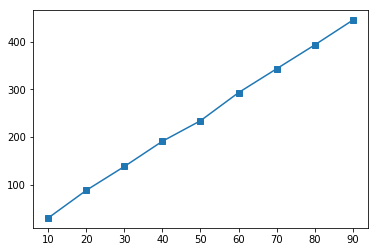

In [3]:
import numpy as np 

num_ops_list = []
n_list = []
for i, n in enumerate(range(10,100,10)): 
    _, num_ops = select(5, np.random.randint(n, size=n), report=False)
    num_ops_list += [num_ops]    
    n_list += [n]
    
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.plot(n_list, num_ops_list, 's-')

### More sophisticated implementation 

Here is the [Wikipedia version of QuickSelect](https://en.wikipedia.org/wiki/Quickselect):

In [4]:
def swap_in_place(xs, i, j):
    dum = xs[i]
    xs[i] = xs[j]
    xs[j] = dum
    
def partition_in_place(xs=[1,4,3,2,5,6,9,8,7], left=0, right=8):
    print xs
    pivotIndex = np.random.randint(left, right)
    pivotValue = xs[pivotIndex]
    print pivotValue
    swap_in_place(xs, pivotIndex, right) # Move pivot to end
    pivot_newIndex = left
    for i in range(left,right):
        if xs[i] < pivotValue:
            swap_in_place(xs, pivot_newIndex, i)
            pivot_newIndex += 1
    swap_in_place(xs, right, pivot_newIndex) # Move pivot to its final place
    print xs
    return pivot_newIndex

def select_in_place(k, xs=[1,4,3,2,5,6,9,8,7], left=0, right=8):
    if left == right:
        return xs[left]  
    # Choosing a random element halves the problem at each step 
    # but only on average and only under the assumption that 
    # the elements are uniformly distributed: 
    pivotIndex = partition_in_place(xs, left, right)
    # The pivot is now in its final sorted position
    if k == pivotIndex:
        return xs[k]
    elif k < pivotIndex:
        return select_in_place(k, xs, left, pivotIndex - 1)
    else:
        return select_in_place(k, xs, pivotIndex + 1, right)
    
select_in_place(5)

[1, 4, 3, 2, 5, 6, 9, 8, 7]
8
[1, 4, 3, 2, 5, 6, 7, 8, 9]
[1, 4, 3, 2, 5, 6, 7, 8, 9]
3
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
4
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
6
[1, 2, 3, 4, 5, 6, 7, 8, 9]


6

In [5]:
partition_in_place()

[1, 4, 3, 2, 5, 6, 9, 8, 7]
6
[1, 4, 3, 2, 5, 6, 9, 8, 7]


5

### Time complexity

The number of comparisons to partition a list is equal to its length. Since partitioning is performed repeatedly on lists that shrink in size by a factor of two, the total time complexity for a list that is initially of size $n$ is the geometric series:

$$ n + \frac{n}{2} + \frac{n}{2^2} + \cdots + 1 = 2n - 1. $$